<a href="https://colab.research.google.com/github/movie112/INU-DILAB/blob/main/INU-DILAB/dacon/dacon101/DACON_101_lv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DACON_101: 머신러닝이 처음이라면 🤔   
🏃‍♀️ [데이터 다운로드] 부터 ️[대회 제출] 까지 🏃‍♂
<https://dacon.io/competitions/open/235698/overview/description>

---
## Lv1. 의사결정회귀나무로 따릉이 데이터 예측하기
### - EDA -
#### EDA 1/5 라이브러리불러오기(import)
- 데이터를 분석하기 위해 불러오고, 조작하는 등 핸들링을 하려면 도구 필요
- 대표적으로 pandas, numpy, matplotlib 등 

In [ ]:
import [라이브러리] as [사용할이름]

#### EDA 2/5 파일 불러오기(read_csv)
- 데이터 파일(csv 파일)을 불러오기 위해서는 pandas 라이브러리를 이용
- 약어로 지정한 pd를 사용하여 read_csv함수를 통해 csv 파일을 불러옴
- csv 파일을 pandas 라이브러리에서 제공하는 DataFrame 객체로 변환

In [ ]:
import pandas as pd
data = pd.read_csv('파일경로/파일이름.csv')

#### EDA 3/5 행열갯수관찰하기(shape)
- 불러온 데이터의 행과 열의 갯수를 shape attribute 로 관찰

In [ ]:
[DataFrame 변수명].shape

#### EDA 4/5 데이터 확인하기(head())
- Pandas 라이브러리를 이용하여 데이터를 확인하는 방법은 여러 가지 존재, 그중 가장 대표적인 메서드 head()
- head() 메서드는 데이터 전부를 보여주지 않고 데이터의 상단부분만 출력
- tail() 메서드는 데이터의 하단 부분을 출력


In [ ]:
train = pd.read_csv('data/train.csv')

train.head() # train 데이터의 상단 5개 행 출력
train.head(10) # train 데이터의 상단 10개 행 출력

train.tail() # train 데이터의 하단 5개 행 출력
train.tail(10) # train 데이터의 하단 10개 행 출력

#### EDA 5/5 결측치 확인하기(is_null() )
- 결측치(Missing Value): 데이터에 값이 없는 것, (NA, NULL)
- Pandas에서의 결측치: NaN
- isnull() 메서드를 사용하면 DataFrame에서 NaN 값을 확인, 데이터가 NaN 값이면 True로, 그렇지 않으면 False로 값을 리턴

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
        'name': ['kwon', 'park', 'kim'],
        'age':[30, np.nan, 19],
        'class':[np.nan, np.nan, 1]
})

df.isnull()
# df.isnull().sum()   -> 각 열 별 결측치의 수 확인

---
### - 전처리 -
#### 전처리 1/2 데이터결측치확인하기(info())
- info() 매서드로 피쳐들의 결측치와 데이터 타입을 확인
- 모델링에 앞서 결측치가 있다면, 결측치들을 어떻게 다뤄야할지 고민하고 처리하는 과정이 필요

In [ ]:
df.info()

#### 전처리 2/2 결측치삭제하기, 대체하기(dropna(), fillna())
- dropna()로 결측치를 갖는 행을 DataFrame 객체에서 삭제
- fillna()로 모든 결측치를 인자값으로 대체

In [ ]:
DataFrame.dropna()
DataFrame.fillna()

### - 모델링 -
#### 모델링 1/6 scikit-learn
- 모델링 라이브러리
- [scikit-learn 공식 홈페이지](https://scikit-learn.org/stable/)

In [1]:
import sklearn
from sklearn.tree import DecisionTreeClassifier

#### 모델링 2/6 모델개념(의사결정나무)
- 의사결정나무(결정트리)   
의사 결정 규칙과 그 결과들을 트리 구조로 도식화한 의사 결정 지원 도구의 일종. 즉, 스무고개 방식으로 구조화
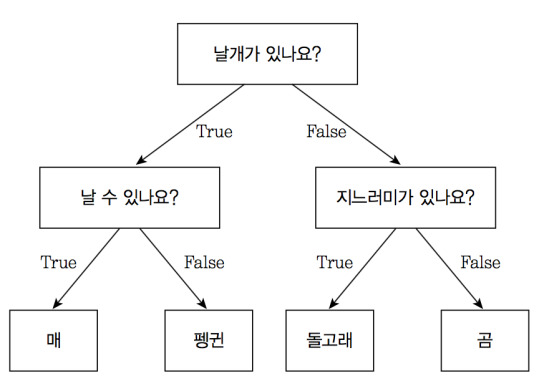</img>

- EDA 를 통해 data를 살펴보면 각 행(row) 들은 피쳐들을 갖고 있다.이 중 하나의 피쳐를 정해서 해당 피쳐의 값에 대해 특정한 하나의 값을 정한다면, 이를 기준으로 모든 행(row) 들을 두 개의 노드(node) 로 분류(Binary decision rule. 이진분할) 가능
- 만약 특정하게 2️⃣개를 정한다면 3️⃣진분할이 됨. 대표적인 CART 의사결정나무는 이진분할 사용. 앞으로 CART에 맞춰 설명.
-파생된 두 노드에 대해서 또 다시 새로운 피쳐의 특정한 값을 정하고 분류 진행. 이 과정을 반복하게 되면 점차 피쳐의 값에 따라 data 들이 분류가 되며 이것이 의사결정 나무의 원리. 🌳
- 특정한 값을 정하는 의사결정 나무의 대원칙은 ✅ "한쪽 방향으로 쏠리도록" ✅  🙅 분류될 때는 공평하게 비슷한 양으로 나뉘도록 값을 정하는 것이 아니라, 🙆 "한쪽 방향으로 쏠리도록" 해주는 특정한 값을 찾는 것이며, 이를 불순도를 계산해서 찾는다.
- 의사결정나무 모델은 scikit-learn 에서 모듈을 불러옴

In [ ]:
import sklearn
from sklearn.tree import DecisionTreeClassifier

#### 모델링 3/6 모델선언(의사결정나무)
- 모듈 불러오기: 해당 라이브러리로부터 원하는 모듈 불러오면 됨
- 우리는 sklearn.tree 에서 DecisionTreeRegressor 모듈을 불러올 것

In [ ]:
from [라이브러리] import [모듈]
model = 모듈명()

#### 모델링 4/6 모델훈련 (의사결정나무)
- fit(X, Y) 함수를 사용해서 모델을 훈련
- data_X: 예측에 사용되는 변수, data_Y: 예측결과 변수

In [ ]:
X_train = train.drop(['제외할컬럼명'], axis=1)  # X: train data 에서 예측할 피쳐 제외 가능
Y_train = train['예측할컬럼명']                 # Y: train['예측할컬럼명']으로 인덱싱 가능

In [ ]:
# 모델 선언, 모델 훈련
model = DecistionRegressor()
model.fit(X_train, Y_train)

#### 모델링 5/6 테스트예측
- 테스트 파일을 훈련된 모델로 예측
- 훈련된 모델에서 predict()매서드에 예측하고자 하는 data를 인자로 넣어주면 해당 결과 array를 할당

In [ ]:
[할당할 array] = model.predict(test)

#### 모델링 6/6 제출파일생성(to_csv())
1️⃣ 백지의 답안지인 submission.csv 파일을 df 파일로 불러와서 예측결과를 덧입혀주고   
2️⃣ 덧입혀준 df 파일을 csv 파일로 내보낸 후,   
3️⃣ 드라이브에 저장된 csv 파일을 다운받아서 제출